
Before lecture today, please go to https://playground.tensorflow.org/

* Try the default.  Note how the first layer identifies simple patterns and the second layer combines those to make more complex patterns.  It also finds a solution quite quickly.  (Note also that it won't stop on its own.  Hit pause when you are happy with the solution it has converged on.)
* Try a ReLU activation function.  Much faster, but with a "boxy" solution.
* See what happens when there is only 1 hidden layer with 3 neurons.  Reset and run it multiple times.
* Compare learning rate 0.001 to 1.0.  
* Now try just 2 neurons (with learning rate back at 0.3).
* Now try 8 neurons.
* Lastly try the spiral dataset with 4 hidden layers, each with 8 neurons.  Run it for at least 1000-1500 epochs -- until it gets the answer "right" (make sure that your computer is plugged in and properly cooled!)  This illustrates the vanishing gradient problem.
* Do this again after lecture.

See Problem 10.1 in Geron



# Neural Networks
G. Richards
(2016, 2018, 2020)
Ivezic 9.8 and Geron

I found this video series particularly helpful in trying to simplify the explanation https://www.youtube.com/watch?v=bxe2T-V8XRs. 

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are a simplified computation architecture based loosely on the real neural networks found in brains.

![Neuron example](https://4.bp.blogspot.com/-Z5LfY6yoIcE/U-OFKWHoAbI/AAAAAAAAAKo/ytH6BzDLeo4/s1600/Picture-533.png)

In the image below the circles on the left represent the **attributes** of our input data, $X$, which here is 3 dimensional.  The circles in the middle represent the neurons.  They take in the information from the input and, based on some criterion decide whether or not to "fire".  The collective results of the neurons in the hidden layer produce the output, $y$, which is represented by the circles on the right, which here is 2 dimensional result.  The lines connecting the circles represent the synapses.  This is a simple example with just one layer of neurons; however, there can be many layers of neurons.
![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

In more detail:

The job of a synapses is to take input values and multiply them by some weight before passing them to the neuron (hidden layer):

$$z = \sum_i w x_i$$

(Each neuron also has a "bias", $b$ that we add, but we'll set that to zero for the sake of simplicity here.)

The neuron then sums up the inputs from all of the synapses connected to it and applies an "activation function".  For example a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.

$$a = \frac{1}{1+e^{-z}}.$$

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png)

What the neural network does is to learn the weights of the synapses that are needed to produce an accurate model of $y_{\rm train}$.

![Ivezic Figure 9.17](https://www.astroml.org/_images/fig_neural_network_1.png)

Rather than think about the inputs individually, we can write this process in matrix form as
$$X W^{(1)} = Z^{(2)}.$$

If $D$ is the number of attributes and $H$ is the number of neurons in the hidden layer, then $X$ is an $N\times D$ matrix, while $W^{(1)}$ is a $D\times H$ matrix.  The result, $Z^{(2)}$, is then an $N\times H$ matrix.

We then apply the activation function to each entry of $Z^{(2)}$ independently: 
$$A^{(2)} = f(Z^{(2)}),$$
where $A^{(2)}$ is the output of the neurons in the hidden layer and is also $N\times H$.

These values are then the inputs for the next set of synapses, where we multiply the inputs by another set of weights, $W^{(2)}:$
$$A^{(2)} W^{(2)} = Z^{(3)},$$

where $W^{(2)}$ is an $H\times O$ matrix and $Z^{(3)}$ is an $N\times O$ matrix with $O$-dimensional output.

Another activation function is then applied to $Z^{(3)}$ to give
$$\hat{y} = f(Z^{(3)}),$$
which is our estimator of $y$.

For example we might have $N=100$ people for which we have measured 
* shoe size
* belt size
* hat size

for whom we know their height and weight.  

Then we are going to use this to predict the height and weight for people where we only know shoe size, belt size, and hat size.

Or to be consistent with my previous example, we have measured the lengths of three different bones and we are going to predict the species and gender.

The neural network then essentially boils down to determining the weights of the synapses, which are usually initialized randomly.

We do that by minimizing the cost function (which compares the true values of $y$ to our predicted values).  Typically:
$$ {\rm Cost} = J = \sum\frac{1}{2}(y - \hat{y})^2.$$

As we saw above, that would be a cost function for regression (where we have only one output node).  For classification, we'd use one of the examples above (but ideally one that is differentiable as we'll see later).

If we just had 1 weight and we wanted to check 1000 possible values, that wouldn't be so bad.  But if we have 20 weights, that means checking $20^{1000}$ possible combinations.    Remember the curse of dimensionality?  That might take a while.  Indeed, far, far longer than the age of the Universe.

Thus the (first) death of neural networks (which are currently on life #3, which is looking more promising).

Life #2 begins with the realization that we can write an analytic formula for the *gradient* going backwards and use that to update our weights.

For example, how about just checking 3 points for each weight and see if we can at least figure out which way is "down hill"?  That's a start.

We can rewrite $J$ as
$$ J = \sum\frac{1}{2}\left(y - f\left( f(X W^{(1)}) W^{(2)} \right) \right)^2$$

and then compute
$$\frac{\partial J}{\partial W}$$
in order to determine the slope of the cost function for each weight.  This is the **gradient descent** method, which we encountered before.  Your choice of cost function is important here; specifically you want it to be differentiable.

We'll want $\partial J/\partial W^{(1)}$ and $\partial J/\partial W^{(2)}$ separately.  This allows us to [*backpropagate*](https://en.wikipedia.org/wiki/Backpropagation) the error contributions along each neuron and to change the weights where they most need to be changed.  It is like each observation gets a vote on which way is "down hill".  We compute the vector sum to decide the ultimate down hill direction.

Once we know the down hill direction from the derivative, we update the weights by subtracting a scalar times that derivative from the original weights.  That's obviously much faster than randomly sampling all the possible combinations of weights.  Once the weights are set, then you have your Neural Network classifier/regressor.

![Ivezic Figure 9.17](https://www.astroml.org/_images/fig_neural_network_1.png)

Scikit-Learn has both [unsupervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#neural-networks-unsupervised) and [supervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised) examples. 

Let's try to use the multi-layer perceptron classifier on the Boston House Price dataset (using 75% of the data for training and 25% for testing).

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
#print(boston.DESCR)

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)
Xscaled = preprocessing.scale(X)

[(13, 5), (5, 2), (2, 1)]


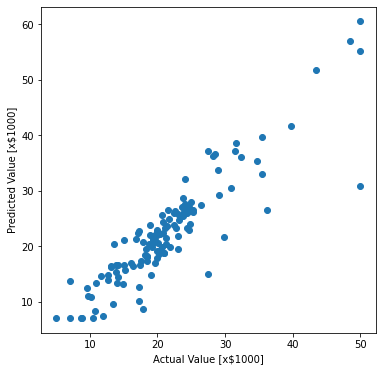

In [2]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=5000)
clf.fit(Xtrain_scaled, ytrain)

# Look at the weights
print([coef.shape for coef in clf.coefs_])

ypred = clf.predict(Xtest_scaled)
#print ypred, ytest

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Of course, that only predicts the value for a fraction of the data set.  Again, we can use Scikit-Learn's [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) to make predictions for the full data set.

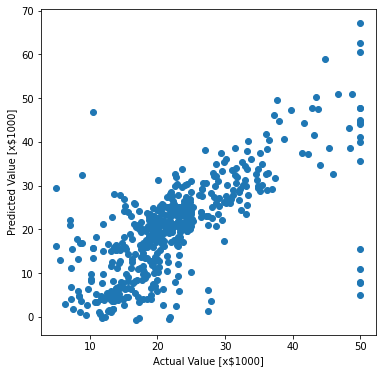

In [7]:
from sklearn.model_selection import cross_val_predict

yCVpred = cross_val_predict(clf, Xscaled, y, cv=3) # Complete

fig = plt.figure(figsize=(6, 6))
plt.scatter(y,yCVpred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Just as with other model hyperparameters, we can use cross-validation to determine the optimal number of layers, neurons per layer, etc.  We'll do that in detail later.  For now, let's talk about some guidelines.

### Number of Layers

Ivezic: 
> "For data that can be represented by a linear model, no layers are required (McCullagh & Nelder 1989).  A single layer network can approximate any continuous function.  Two layers can represent arbitrary decision boundaries for smooth functions (Lippmann 1987).  More layers can represent non-continuous or complex structure within the data."  


Think about why no layers are needed for linear regression.  We just connect our input to output where they synapses are the weights (slopes) and the output neurons add the constant (intecept).

So you might start with a single layer, then add more layers and use cross-validation to determine when you are overfitting.

Geron has a good example of what adding layers does.  Say you had to draw a whole forest, but you couldn't cut and paste anything.  That would be very tedious.  But if you could draw just one leaf and copy that to make a small branch, then scale up a small branch to a big branch and copy that, then attach the branches to a tree trunk and then make copies of the full tree, you wouldn't have to draw all that much.  Each of the layers in a neural network handles  more and more detailed aspects of the problem.  We saw this in the opening pre-lecture experiments.

For image recognition, you might need dozens of layers, but also a huge training set to populate those layers.

### Number of Neurons


The number of neurons in each layer is also a free parameter.  Typically choose somewhere between twice the number of input nodes and a number between the number of input and output nodes.

If there are lots of hidden layers (where "lots" is not clearly defined) then we call that a deep neural network or [deep learning](https://en.wikipedia.org/wiki/Deep_learning).  More on that later.


Sometimes the number of neurons in each layer goes down.  But it can also be useful to have the same number in each layer so that there is only one hyperparameter (the number of neurons) and not one per layer.

In practice a reasonable approach is to simply specify many more layers and neurons than you need and perform regularization.  This can be as simple as just stopping the training when the cross-validation error reaches a minimum, which appropriately (for once) is called [early stopping](https://en.wikipedia.org/wiki/Early_stopping).  Basically, you put your `fit` method into a loop and instantiate with `max_iter=1` and `warm_start=True`.  See Geron (page 141) for an example.  Indeed the examples from the start of class where we had to stop the process is a good illustration of this.
 


While the number of neurons in the hidden layers are free parameters the number of input and output nodes are constrained by the data and the desired output.  For example, the MNIST digits data requires 784 input neurons (one for each pixel in the 28x28 images) and 10 output neurons (one for each class [digit]).  


### Activation Functions

[Activation function](https://en.wikipedia.org/wiki/Activation_function) control how much "signal" it takes for a neuron to "fire".  The more signal, the more likely the neuron will fire.

See
https://mlfromscratch.com/activation-functions-explained/#/

The cells below show different activation functions, using the same visualization as we used for loss functions.

In [4]:
# Mathematical formulas for activation functions
  
def binary(raw_model_output):
   return np.where(raw_model_output < 0, 0, 1)  

def sigmoid(raw_model_output):
   return 1.0/(1+np.exp(-raw_model_output))

def ReLU(raw_model_output):
   return np.where(raw_model_output < 0, 0, raw_model_output)

def LReLU(raw_model_output):
   alpha=0.1
   return np.where(raw_model_output < 0, alpha*raw_model_output, raw_model_output)

<ipython-input-5-96589d1827da>:14: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0 3] in fill_betweenx(). This will become an error two minor releases later.
  plt.fill_between([0,3],-1,3,"b",alpha=0.4)
<ipython-input-5-96589d1827da>:15: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [-3 0] in fill_betweenx(). This will become an error two minor releases later.
  plt.fill_between([-3,0],-1,3,"r",alpha=0.5)


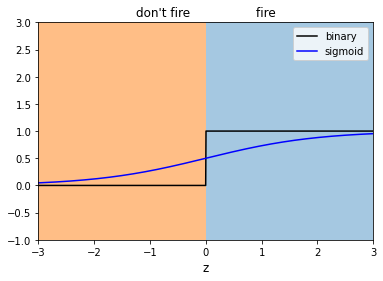

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values and plot
grid = np.linspace(-3,3,1000)
#plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, binary(grid), "k", label='binary')
plt.plot(grid, sigmoid(grid), "b", label='sigmoid')
#plt.plot(grid, ReLU(grid), label='ReLU')
#plt.plot(grid, LReLU(grid), label='LReLU')
#plt.plot(grid, l2(grid), label='l2')
#plt.plot(grid, l1(grid), label='l1')

plt.fill_between([0,3],-1,3,"b",alpha=0.4)
plt.fill_between([-3,0],-1,3,"r",alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-1,3])
plt.xlabel("z",fontsize=12)
#plt.ylabel("probability",fontsize=12)
plt.title("don't fire                 fire",fontsize=12)
plt.legend()

plt.show()

Until the paper describing backpropagation, a step (binary) function was used for activation: that is either *on* or *off*, which makes sense as neurons either fire or they don't.  However, the step function doesn't have gradients, so backpropagation won't work with them.  

Moreover on vs. off actually isn't quite true.  The way your eyes work is that you need 1-10 photons to trigger a rod, but several rods must be triggered to send a signal to the brain.  The sigmoid activation function captures the probabilistic nature of neuron firing.  More importantly it is differentiable, so can be used for backpropagation.

Another important aspect of non-linear activation function is that they are what allow neural networks to solve non-linear problems.  If we used a strictly linear activation function, then we could only solve linear problems.  That is, you could fit a straight line, but not an exponential.

#### Vanishing and Exploding Gradients

However, neural networks suffered their 2nd death at the hands of the [vanishing and exploding gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problem.  We won't go into detail there except to say that life #3 began around 2010 when suggestions for different activation functions were published.  

For example, the Rectified Linear Unit (ReLU) activation function is another commonly used activation function as it solves the vanishing gradient problem (since the gradient is only 0 or 1).

$${\rm ReLU}(z) = max(0,z)$$

It isn't ideal both because the derivative is 0 for $z<0$ and it can end up producing dead nodes.  However, it is fast and the resulting sparsity can be good (sort of like regularization).

A number of papers since 2015 describe various improvements, including the Leaky RELU, the exponential linear unit (ELU) and scaled exponential linear unit (SELU).

Note that the activation functions can be different in different layers.  For example, for regression, one typically doesn't use any activation function in the output layer as including one would restriction the range of possible outputs.



<ipython-input-6-51091ab57138>:14: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0 3] in fill_betweenx(). This will become an error two minor releases later.
  plt.fill_between([0,3],-1,3,"b",alpha=0.4)
<ipython-input-6-51091ab57138>:15: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [-3 0] in fill_betweenx(). This will become an error two minor releases later.
  plt.fill_between([-3,0],-1,3,"r",alpha=0.5)


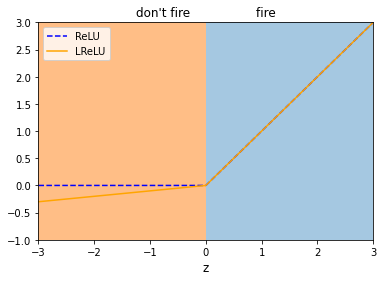

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values and plot
grid = np.linspace(-3,3,1000)
#plt.plot(grid, log_loss(grid), label='logistic')
#plt.plot(grid, binary(grid), "k", label='binary')
#plt.plot(grid, sigmoid(grid), "b", label='sigmoid')
plt.plot(grid, ReLU(grid), "b--", label='ReLU')
plt.plot(grid, LReLU(grid), "orange", label='LReLU')
#plt.plot(grid, l2(grid), label='l2')
#plt.plot(grid, l1(grid), label='l1')

plt.fill_between([0,3],-1,3,"b",alpha=0.4)
plt.fill_between([-3,0],-1,3,"r",alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-1,3])
plt.xlabel("z",fontsize=12)
#plt.ylabel("probability",fontsize=12)
plt.title("don't fire                 fire",fontsize=12)
plt.legend()

plt.show()

Some general guidance on activation functions (more on this later):
    
* Use sigmoid for output of binary classification (with binary cross entropy loss)
* Use ReLU for layers other than output (at least to start with because it is faster)
* Use softmax for output with more than 2 classes (with categorical cross entropy loss)

### Regularization

Just as we can use regularization for standard regression and classification task, so too can we with neural networks.  

Not only can we apply the usual $l1$ or $l2$ regularization techniques, but we can also use *dropout* which, as the name indicates, causes some neurons to be temporarily "dropped out" during training (usually by setting some probability for that to happen, typically 10-50%).  After training, all of the neurons are used.

Geron explains this as a company needing to try to figure out how to adapt to a crucial employee being out sick for a period of time.  In the end, it can make the company stronger as more people (neurons) are able to handle certain parts of the process.

We'll do an example of this next time.


### Batch normalization

Just as it is often necessary to normalize or standardize our features, sometimes it is helpful to do the same to the output of the hidden layers.  This is called [batch normalization](https://en.wikipedia.org/wiki/Batch_normalization) and is done before passing the data to the activation function.  It make the process more stable and can also make it faster.  We'll do an example next time. 

### Faster Optimizers

We aren't going to talk about optimizers, but it might be useful for you to have some options to feed into a search for the best parameter using cross validation.  For example `['mse', 'adam', 'sgd', 'adagrad']`.

---

### Advanced Topics in Neural Networks with Deep Learning

Recent interest in neural networks surged in 2012 when a team using a deep [convolutional neural network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) acheived record results classifying objects in the [ImageNet](http://image-net.org/) data set.

The idea behind CNNs is inspired by human visual perception.  Each neuron in your visual cortex doesn't "see" all of what your eye can see at once and some neuron are more sensitive to one pattern over another (e.g., horizontal lines vs. vertical lines).  

Moreover, the simplest deeply connected neural networks would choke on "real" data which has far more than 28x28 pixels and would require following tens of millions of connections.  So we use a combination of "convolution" and "pooling" to reduce the dimensionality of the data first.

![Ivezic Figure 9.19](https://www.astroml.org/_images/fig_cnn_1.png)

### Convolutional Layers

In a convolutional layer, each neuron is not connected to each neuron in the previous layer, but only those that are within its "field of view" as defined by a kernel (filter).  We slide the kernel over the input layer and the value in the next layer depends only on those pixels.

![Convolutional Layer](https://miro.medium.com/max/1400/1*wLlXFtWI--7knyQT2wlhMg.png)

Here's another perspective that helps to visualize going from one layer to the next.

![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)

Choosing a filter (kernel) with a certain pattern can help recognize certain types of features (like horizontal aor vertical lines).

![vertical filter](https://miro.medium.com/max/1338/1*7IEbBib7Yc7qST5IGQoYXA.jpeg)

![horizontal filter](https://miro.medium.com/max/1238/1*PSSAaH2pZbl5bK3Ef_zk4A.jpeg)

It is common to follow the convolutional layer by a so-called "pooling layer", essentially to reduce the amount of data that needs to be processed.  The full architechture of a CNN might look something like this:
![CNN Example](https://www.researchgate.net/profile/Xian_Wei2/publication/331986652/figure/fig1/AS:740547106988032@1553571597647/The-classic-structure-of-CNN-It-consists-of-two-modules-Feature-extraction-module-and.ppm)

Where the pooling layers are reducing the number of pixels by averaging, summing, taking the max, etc.:

![Pooling example](https://miro.medium.com/max/1000/1*ydNsGDxMldAiq7b96GDQwg.jpeg)

When you are done, the output gets feed into a regular, fully connected neural network which outputs the predictions.

This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usable thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).

The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration.

We'll see a worked example of a CNN next time.

For further study, there are lots of resources for CNNs online.  For example, see
https://medium.com/analytics-vidhya/convolutional-neural-networks-cnn-explained-step-by-step-69137a54e5e7

### Autoencoders

Autoencoders are neural networks that copy their input to their output, but after passing the data through a bottleneck.  For example if there are 28x28 = 784 inputs, there will also be 784 outputs, but there will be one or more (odd, but symmetric) hidden layers with fewer neuron than that.

For example see 

![autoencoder structure](https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

from
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

You can think of this as doing PCA with a neural network -- breaking our data down into the only the most important features that we actually *need* (finding the intrinsic dimensionality).   In fact, if the network uses only linear (or no) activation functions and $l2$ cost function, then we have exactly PCA.  

How might this be useful?  Well, for example we can use it to reconstruct MNIST digits that have had noise added to them:

![autoencoder example](https://miro.medium.com/max/1400/1*SxwRp9i23OM0Up4sEze1QQ@2x.png)

More exciting to me is the possibility to use autoencoders for "unsupervised pretraining".  For example you have data that is only partially labeled (at least not enough to do traditional supervised classification).  We can train an autoencoder on the full data set, then used the encoder part as the base of a regular neural network that is trained on the labeled data that we do have.  See Geron Figure 17.6

Also for [anomaly detection](https://scikit-learn.org/stable/modules/outlier_detection.html).
See also
https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/ and 
https://towardsdatascience.com/autoencoder-neural-network-for-anomaly-detection-with-unlabeled-dataset-af9051a048.

#### Variational Autoencoders

More common in astronomy are variational autoencoders, partly because the "latent space" that results from a standard autoencoder doesn't necessarily map continuously to the data (e.g., if your training data don't span the full data space).  We won't go into detail, just realize that these are something that you might try if you were otherwise going to try an autoencoder to tackle your problem.

![Ivezic Figure 9.21](https://www.astroml.org/_images/fig_vae_1.png)

### Generative Adversarial Networks (GANs)

GANs are pure evil, see
https://thispersondoesnotexist.com

But they are also brilliant, incredibly useful, and relatively new (2014).  The idea builds logically on autoencoders in that we have a generator (like the decoder part of an autoencoder) that can produce fake data (e.g., an image).  Then we have a discriminator (a standard binary classifier) that tries to distinguish fake data from real.  Then the generator learns to produce more and more accurate images to trick the discriminator -- without ever seeing any real images -- it just has the feedback from the discriminator.

See Geron Figure 17.15 for a cartoon of the structure.

For more, see
https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29

Astronomy has seen some interesting uses of autoencoders and GANs in recent years.  For example:
    
https://arxiv.org/abs/1702.00403    
https://www.aanda.org/articles/aa/full_html/2017/07/aa30240-16/aa30240-16.html